In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from apyori import apriori
from wordcloud import WordCloud
import statistics

In [2]:
Order_Details = pd.read_csv('Order_details(masked).csv')

# EDA & Data Cleaning

In [3]:
Order_Details.head()

,Name,Email,Product,Transaction Date
0,PERSON_1,PERSON_1@gmail.com,PRODUCT_75,01/03/2021 00:47:26
1,PERSON_2,PERSON_2@tataprojects.com,PRODUCT_75,01/03/2021 02:04:07
2,PERSON_3,PERSON_3@gmail.com,PRODUCT_63,01/03/2021 09:10:43
3,PERSON_4,PERSON_4@gmail.com,PRODUCT_63,01/03/2021 09:49:48
4,PERSON_5,PERSON_5@gmail.com,"PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89",01/03/2021 10:56:46


In [4]:
Order_Details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581 entries, 0 to 580
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Name              581 non-null    object
 1   Email             581 non-null    object
 2   Product           581 non-null    object
 3   Transaction Date  581 non-null    object
dtypes: object(4)
memory usage: 18.3+ KB


In [5]:
Order_Details.describe()

,Name,Email,Product,Transaction Date
count,581,581,581,581
unique,525,525,252,581
top,PERSON_470,PERSON_470@gmail.com,PRODUCT_75,01/03/2021 00:47:26
freq,5,5,74,1


In [6]:
Order_Details.shape

(581, 4)

In [7]:
Order_Details.isnull().sum() #no null value, so this part doesn't need to be cleaned

Name                0
Email               0
Product             0
Transaction Date    0
dtype: int64

In [8]:
df1 = Order_Details["Name"]
print(df1)

0        PERSON_1
1        PERSON_2
2        PERSON_3
3        PERSON_4
4        PERSON_5
          ...    
576    PERSON_522
577    PERSON_523
578    PERSON_523
579    PERSON_524
580    PERSON_525
Name: Name, Length: 581, dtype: object


In [9]:
print(df1.shape)

(581,)


In [10]:
df2 = Order_Details["Product"]
print(df2)

0                                             PRODUCT_75
1                                             PRODUCT_75
2                                             PRODUCT_63
3                                             PRODUCT_63
4            PRODUCT_34,PRODUCT_86,PRODUCT_57,PRODUCT_89
                             ...                        
576    PRODUCT_48,PRODUCT_80,PRODUCT_71,PRODUCT_68,PR...
577                                            PRODUCT_8
578    PRODUCT_36,PRODUCT_14,PRODUCT_64,PRODUCT_28,PR...
579    PRODUCT_75,PRODUCT_71,PRODUCT_86,PRODUCT_63,PR...
580                                PRODUCT_66,PRODUCT_34
Name: Product, Length: 581, dtype: object


In [12]:
reshaped = \
(Order_Details.set_index(Order_Details.columns.drop('Product',1).tolist())
   .Product.str.split(',', expand=True)
   .stack()
   .reset_index()
   .rename(columns={0:'Product'})
   .loc[:, Order_Details.columns]
)

In [13]:
print(reshaped)

            Name                      Email     Product     Transaction Date
0       PERSON_1         PERSON_1@gmail.com  PRODUCT_75  01/03/2021 00:47:26
1       PERSON_2  PERSON_2@tataprojects.com  PRODUCT_75  01/03/2021 02:04:07
2       PERSON_3         PERSON_3@gmail.com  PRODUCT_63  01/03/2021 09:10:43
3       PERSON_4         PERSON_4@gmail.com  PRODUCT_63  01/03/2021 09:49:48
4       PERSON_5         PERSON_5@gmail.com  PRODUCT_34  01/03/2021 10:56:46
...          ...                        ...         ...                  ...
1344  PERSON_524       PERSON_524@gmail.com  PRODUCT_86  07/03/2021 23:59:26
1345  PERSON_524       PERSON_524@gmail.com  PRODUCT_63  07/03/2021 23:59:26
1346  PERSON_524       PERSON_524@gmail.com  PRODUCT_54  07/03/2021 23:59:26
1347  PERSON_525       PERSON_525@gmail.com  PRODUCT_66  07/03/2021 23:59:19
1348  PERSON_525       PERSON_525@gmail.com  PRODUCT_34  07/03/2021 23:59:19

[1349 rows x 4 columns]


In [14]:
reshaped['Name']

0         PERSON_1
1         PERSON_2
2         PERSON_3
3         PERSON_4
4         PERSON_5
           ...    
1344    PERSON_524
1345    PERSON_524
1346    PERSON_524
1347    PERSON_525
1348    PERSON_525
Name: Name, Length: 1349, dtype: object

In [15]:
#Most Frequent Customer

Order_Details['Name'].mode()

0    PERSON_470
dtype: object

## 1. Who Are The Most Recurring Customers?

Customer Name	Number of Times Purchased

PERSON_470		5
PERSON_330		4
PERSON_75		3
PERSON_156		3
PERSON_290		3
PERSON_283		3
PERSON_263		2
PERSON_91		2
PERSON_207		2
PERSON_344		2
PERSON_343		2
PERSON_335		2
PERSON_71		2
PERSON_74		2
PERSON_195		2


<BarContainer object of 15 artists>

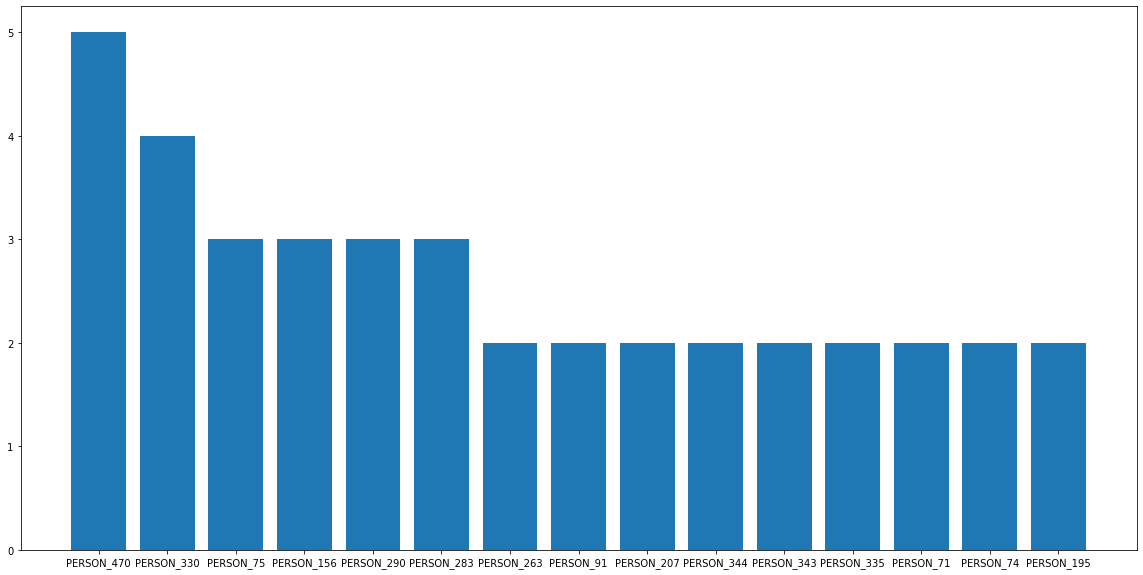

In [60]:
# Top N Customers By Most Frequency of Occurrence

n = 15
custmost1 = Order_Details['Name'].value_counts().index.tolist()[:n]
custmost2 = Order_Details['Name'].value_counts().values.tolist()[:n]
custmost = np.column_stack((custmost1,custmost2))
print("\033[1mCustomer Name\033[0m" + '\t' + "\033[1mNumber of Times Purchased\033[0m\n")
print('\n'.join('\t\t'.join(map(str, row)) for row in custmost))


plt.figure(figsize=(20,10))
plt.bar(custmost1,custmost2)

## 2. Which Products Are Most Sold/Purchased?

Product Name	Units Sold (Number/Quantity)

PRODUCT_75		121
PRODUCT_63		97
PRODUCT_27		76
PRODUCT_25		59
PRODUCT_12		52
PRODUCT_74		49
PRODUCT_34		44
PRODUCT_68		32
PRODUCT_57		30
PRODUCT_85		26


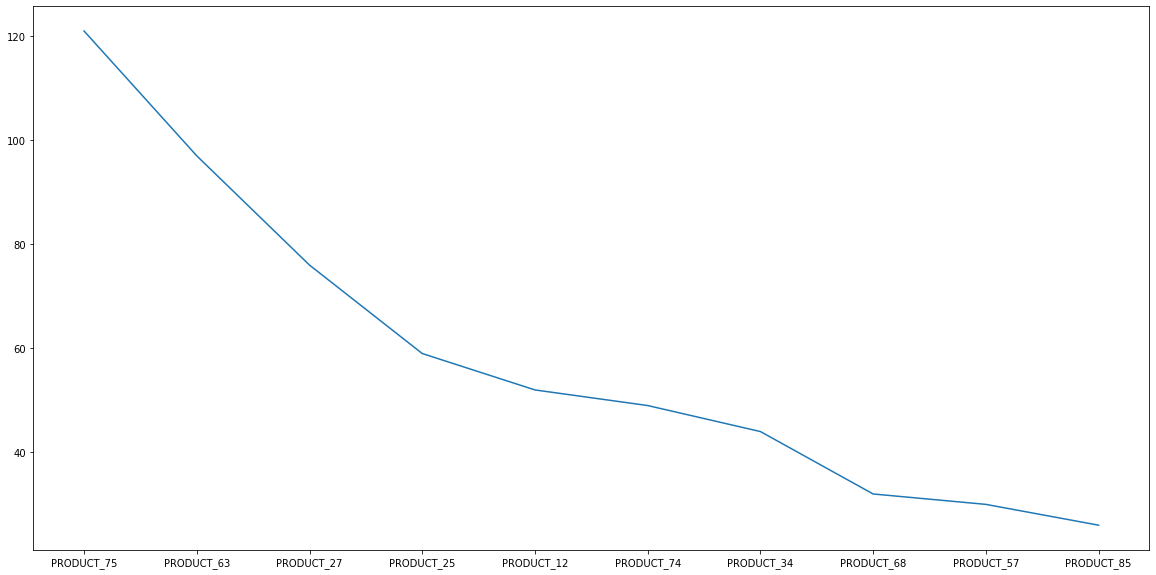

In [61]:
# Top N Products Sold By Most Frequency Of Occurence

n = 10

prodmost1 = reshaped['Product'].value_counts().index.tolist()[:n]
prodmost2 = reshaped['Product'].value_counts().values.tolist()[:n]
prodmost = np.column_stack((prodmost1,prodmost2))
print("\033[1mProduct Name\033[0m" + '\t' + "\033[1mUnits Sold (Number/Quantity)\033[0m\n")
print('\n'.join('\t\t'.join(map(str, row)) for row in prodmost))

plt.figure(figsize=(20,10))
plt.plot(prodmost1,prodmost2)

In [32]:
split_mail = Order_Details['Email'].str.split('@', n=1, expand=True)
split_mail.rename(columns={0:'USERNAME', 1:'DOMAIN'})



,USERNAME,DOMAIN
0,PERSON_1,gmail.com
1,PERSON_2,tataprojects.com
2,PERSON_3,gmail.com
3,PERSON_4,gmail.com
4,PERSON_5,gmail.com
...,...,...
576,PERSON_522,gmail.com
577,PERSON_523,gmail.com
578,PERSON_523,gmail.com
579,PERSON_524,gmail.com
